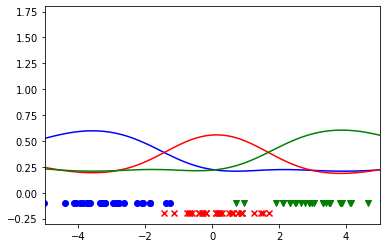

In [179]:
import numpy as np
import matplotlib

#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

np.random.seed(1)


def generate_data(sample_size=90, n_class=3):
    x = (np.random.normal(size=(sample_size // n_class, n_class))
         + np.linspace(-3., 3., n_class)).flatten()
    y = np.broadcast_to(np.arange(n_class),
                        (sample_size // n_class, n_class)).flatten()
    return x, y


def minimum_square(x, y, h, l, n_class):
    sample_size = len(x)
    K = np.exp(-(x[None] - x[:, None]) ** 2 / (2 * h ** 2))
    P = np.zeros((sample_size, n_class))
    for i in range(sample_size):
        P[i, y[i]] = 1.0
    theta = np.linalg.inv(K.T.dot(K) + l*np.eye(sample_size)).dot(K.T).dot(P)
    return theta


def visualize(x, y, theta, h):
    X = np.linspace(-5., 5., num=100)
    K = np.exp(-(x[None] - X[:, None]) ** 2 / (2 * h ** 2))
    plt.clf()
    plt.xlim(-5, 5)
    plt.ylim(-.3, 1.8)
    logit = K.dot(theta)
    unnormalized_prob = np.exp(logit - np.max(logit, axis=1, keepdims=True))
    prob = unnormalized_prob / unnormalized_prob.sum(1, keepdims=True)

    plt.plot(X, prob[:, 0], c='blue')
    plt.plot(X, prob[:, 1], c='red')
    plt.plot(X, prob[:, 2], c='green')

    plt.scatter(x[y == 0], -.1 * np.ones(len(x) // 3), c='blue', marker='o')
    plt.scatter(x[y == 1], -.2 * np.ones(len(x) // 3), c='red', marker='x')
    plt.scatter(x[y == 2], -.1 * np.ones(len(x) // 3), c='green', marker='v')

x, y = generate_data(sample_size=90, n_class=3)
h = 2.
theta = minimum_square(x, y, h=h, l=2., n_class=3)
visualize(x, y, theta, h=h)

[[ 1.27111713  0.24682281 -0.5091506 ]
 [-0.67468381  0.62416048 -0.08737265]
 [-0.45010397  0.18674154 -0.65689524]
 [ 0.91069011 -0.6385083   1.20322936]
 [ 0.25033962  0.89730893 -1.24549023]
 [ 0.0203578   1.04759936 -1.11171887]
 [-0.21132911  0.11745028 -1.51284246]
 [ 0.29940554  1.02203244 -1.01963388]
 [ 0.28871971 -1.26629289 -0.02285976]
 [-1.38312584  0.93286531  0.36480641]
 [-0.17508213 -0.51052307  1.15958255]
 [ 1.8128516  -1.55690653  1.08933884]
 [ 1.86057943  0.14664733 -1.24083234]
 [ 0.79866713  0.05366552 -0.77382827]
 [-1.26047339  0.53965322  0.83410639]
 [-0.41224718  0.33002377 -1.16507238]
 [ 0.71332703  0.30763848 -0.35910695]
 [-0.22642847  1.05727147  0.68670892]
 [ 0.75630847 -0.03394092  0.0226201 ]
 [ 0.47360947  0.53960206  0.5202147 ]] ---
[[ 8.4667946   3.15989691  1.01575941]
 [ 8.74032053  3.25197396  1.01919833]
 [ 9.0052284   3.34033291  1.01812179]
 [ 9.26036626  3.42474048  1.01232739]
 [ 9.50461686  3.50501505  1.00164873]
 [ 9.73690507  3.581

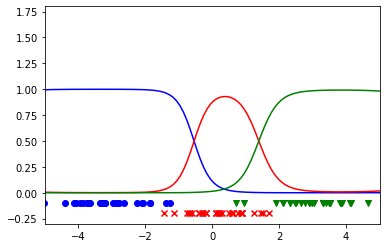

In [ ]:
# import numpy as np
# import matplotlib

# #matplotlib.use('TkAgg')
# import matplotlib.pyplot as plt

# np.random.seed(1)


# def generate_data(sample_size, n_class):
#     x = (np.random.normal(size=(sample_size // n_class, n_class))
#          + np.linspace(-3., 3., n_class)).flatten()
#     y = np.broadcast_to(np.arange(n_class),
#                         (sample_size // n_class, n_class)).flatten()
#     return x, y


# def sga_with_replacement(x, y, h, lr, n_class):
#     sample_size = len(x)
#     theta = np.random.normal(size=(sample_size, n_class))

#     for i in range(sample_size * 10 ** 3):
#         theta_prev = theta.copy()
#         idx = np.random.randint(0, sample_size)

#         phi_x = np.exp(-(x - x[idx]) ** 2 / (2 * h ** 2))
#         logit = phi_x.dot(theta)
#         # subtracting mean for numerical stability
#         unnormalized_prob = np.exp(logit - np.max(logit))
#         prob = unnormalized_prob / unnormalized_prob.sum()
#         gtheta = -prob * phi_x[:, None] + np.where(
#             np.arange(n_class) == y[idx], 1., 0.) * phi_x[:, None]
#         theta += lr * gtheta
#         if np.linalg.norm(theta - theta_prev) < 1e-3:
#             break

#     return theta


# def visualize(x, y, theta, h):
#     X = np.linspace(-5., 5., num=100)
#     K = np.exp(-(x - X[:, None]) ** 2 / (2 * h ** 2))
#     plt.clf()
#     plt.xlim(-5, 5)
#     plt.ylim(-.3, 1.8)
#     logit = K.dot(theta)
#     print(theta[:20], "---")
#     print(logit[:20])
#     unnormalized_prob = np.exp(logit - np.max(logit, axis=1, keepdims=True))
#     prob = unnormalized_prob / unnormalized_prob.sum(1, keepdims=True)

#     plt.plot(X, prob[:, 0], c='blue')
#     plt.plot(X, prob[:, 1], c='red')
#     plt.plot(X, prob[:, 2], c='green')

#     plt.scatter(x[y == 0], -.1 * np.ones(len(x) // 3), c='blue', marker='o')
#     plt.scatter(x[y == 1], -.2 * np.ones(len(x) // 3), c='red', marker='x')
#     plt.scatter(x[y == 2], -.1 * np.ones(len(x) // 3), c='green', marker='v')


# x, y = generate_data(sample_size=90, n_class=3)
# theta = sga_with_replacement(x, y, h=2., lr=.1, n_class=3)
# visualize(x, y, theta, h=2.)